Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




   Meter_ID Location Daily_Consumption
1         1    Urban              13.8
2         2    Urban               7.9
3         3    Urban              14.3
4         4    Urban              60.0
5         5 Suburban              22.6
6         6 Suburban              13.3
7         7 Suburban              14.0
8         8    Urban               7.9
9         9    Rural              16.8
10       10    Rural              12.4


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.30   12.18   14.15   18.76   17.45   80.00 

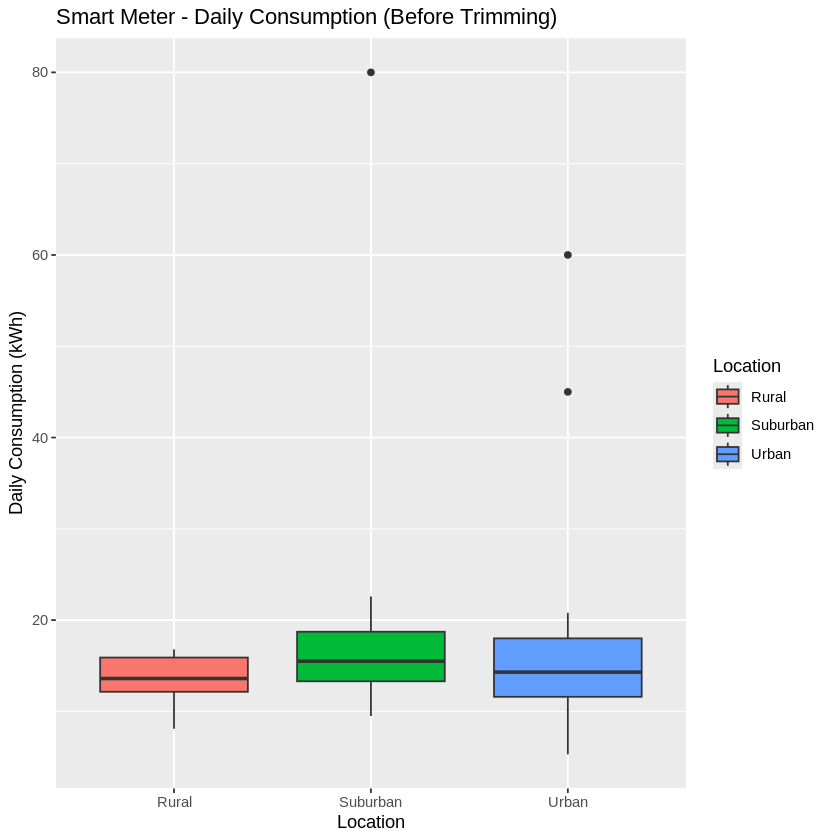

Q1 = 12.175  Q3 = 17.45  IQR = 5.275 
Lower bound = 4.2625  Upper bound = 25.3625 
Detected outliers (rows):
  Meter_ID Location Daily_Consumption
1        4    Urban                60
2       12    Urban                45
3       27 Suburban                80
Rows before trimming: 30 
Rows after trimming : 27 


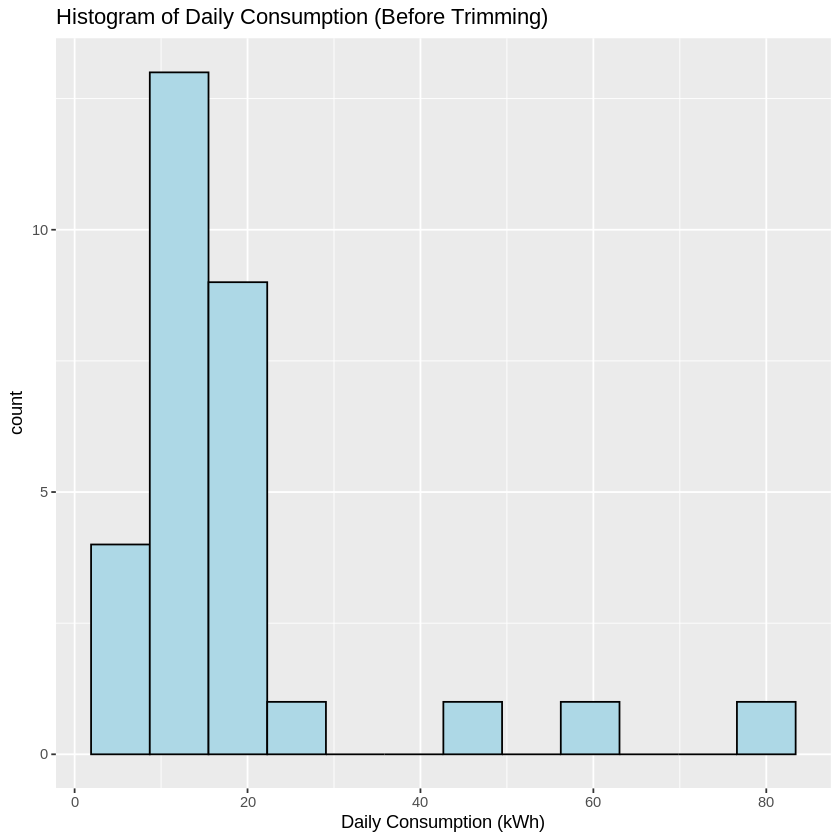


Summary BEFORE trimming:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.30   12.18   14.15   18.76   17.45   80.00 

Summary AFTER trimming:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.3    12.0    13.8    14.0    16.8    22.6 

Model summary BEFORE trimming:

Call:
lm(formula = Daily_Consumption ~ Location, data = smart_meter)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.877  -7.819  -3.838   0.546  58.100 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)        13.514      6.040   2.237   0.0337 *
LocationSuburban    8.386      7.875   1.065   0.2964  
LocationUrban       5.663      7.492   0.756   0.4563  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.98 on 27 degrees of freedom
Multiple R-squared:  0.04083,	Adjusted R-squared:  -0.03022 
F-statistic: 0.5746 on 2 and 27 DF,  p-value: 0.5697


Model summary AFTER trimming:

Call:
lm(formula = Daily_Consumption ~ Location

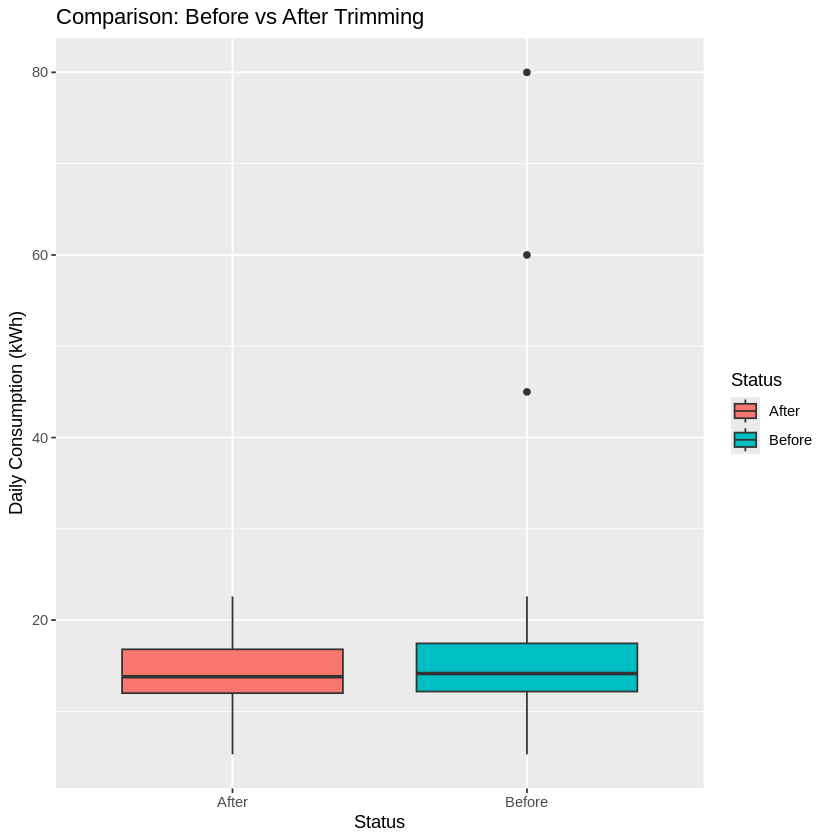

In [1]:
# ------------------------------
# Smart-meter trimming example
# ------------------------------
install.packages("dplyr")
install.packages("ggplot2")

library(dplyr)
library(ggplot2)

# 1) Create a small synthetic smart meter dataset
set.seed(42)
smart_meter <- data.frame(
  Meter_ID = 1:30,
  Location = sample(c("Urban", "Suburban", "Rural"), 30, replace = TRUE),
  Daily_Consumption = round(rnorm(30, mean = 15, sd = 4), 1) # usual consumption
)

# Introduce a few extreme spikes to simulate outliers (e.g., meter error or tampering)
smart_meter$Daily_Consumption[c(4, 12, 27)] <- c(60, 45, 80)

# Quick peek at data
print(head(smart_meter, 10))
summary(smart_meter$Daily_Consumption)

# 2) Visualize original data using a boxplot and histogram
ggplot(smart_meter, aes(x = Location, y = Daily_Consumption, fill = Location)) +
  geom_boxplot() +
  labs(title = "Smart Meter - Daily Consumption (Before Trimming)",
       y = "Daily Consumption (kWh)")

ggplot(smart_meter, aes(x = Daily_Consumption)) +
  geom_histogram(bins = 12, color = "black", fill = "lightblue") +
  labs(title = "Histogram of Daily Consumption (Before Trimming)", x = "Daily Consumption (kWh)")

# 3) Compute IQR and trimming bounds for Daily_Consumption
Q1 <- quantile(smart_meter$Daily_Consumption, 0.25, na.rm = TRUE)
Q3 <- quantile(smart_meter$Daily_Consumption, 0.75, na.rm = TRUE)
IQR_value <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

cat("Q1 =", Q1, " Q3 =", Q3, " IQR =", IQR_value, "\n")
cat("Lower bound =", lower_bound, " Upper bound =", upper_bound, "\n")

# 4) Identify outliers
outliers <- smart_meter %>%
  filter(Daily_Consumption < lower_bound | Daily_Consumption > upper_bound)

cat("Detected outliers (rows):\n")
print(outliers)

# 5) Remove outliers (trimming)
smart_meter_trimmed <- smart_meter %>%
  filter(Daily_Consumption >= lower_bound & Daily_Consumption <= upper_bound)

cat("Rows before trimming:", nrow(smart_meter), "\n")
cat("Rows after trimming :", nrow(smart_meter_trimmed), "\n")

# 6) Visual comparison: before vs after trimming
smart_meter$Status <- "Before"
smart_meter_trimmed$Status <- "After"
compare_df <- bind_rows(smart_meter, smart_meter_trimmed)

ggplot(compare_df, aes(x = Status, y = Daily_Consumption, fill = Status)) +
  geom_boxplot() +
  labs(title = "Comparison: Before vs After Trimming", y = "Daily Consumption (kWh)")

# 7) Summary statistics before and after trimming
cat("\nSummary BEFORE trimming:\n")
print(summary(smart_meter$Daily_Consumption))

cat("\nSummary AFTER trimming:\n")
print(summary(smart_meter_trimmed$Daily_Consumption))

# 8) (Optional) Fit a simple model to show effect of trimming
# Example: Daily_Consumption ~ Location (as numeric encoding with dummy variables)
model_before <- lm(Daily_Consumption ~ Location, data = smart_meter)
model_after  <- lm(Daily_Consumption ~ Location, data = smart_meter_trimmed)

cat("\nModel summary BEFORE trimming:\n"); print(summary(model_before))
cat("\nModel summary AFTER trimming:\n");  print(summary(model_after))
